In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
amtrak = pd.read_csv(r"C:\Users\srira\Desktop\Ram\Data science\Datasets\Module 26 - Forecasting or Timeseries\Amtrak.csv")
amtrak.head()

,Month,Ridership ('000)
0,Jan-91,1709
1,Feb-91,1621
2,Mar-91,1973
3,Apr-91,1812
4,May-91,1975


In [33]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [34]:
p = amtrak['Month'][0]
p[0:3]

'Jan'

In [35]:
amtrak['months'] = 0

In [36]:
amtrak.shape

(159, 3)

In [37]:
for i in range(amtrak.shape[0]):
    p = amtrak['Month'][i]
    for j in month:
        if j in p:
            p=j
    amtrak['months'][i]=p

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
amtrak.head()

,Month,Ridership ('000),months
0,Jan-91,1709,Jan
1,Feb-91,1621,Feb
2,Mar-91,1973,Mar
3,Apr-91,1812,Apr
4,May-91,1975,May


In [39]:
amtrak['Month'].value_counts()

Jun-94    1
Oct-99    1
2-Aug     1
Nov-95    1
Apr-96    1
         ..
May-00    1
Apr-98    1
Aug-92    1
Apr-92    1
Sep-95    1
Name: Month, Length: 159, dtype: int64

In [40]:
month_dummies = pd.DataFrame(pd.get_dummies(amtrak['months']))

In [41]:
month_dummies.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [42]:
amtrak = pd.concat([amtrak,month_dummies],axis=1)
amtrak.head()

,Month,Ridership ('000),months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-91,1709,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-91,1621,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-91,1973,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-91,1812,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,May-91,1975,May,0,0,0,0,0,0,0,0,1,0,0,0


In [44]:
amtrak.rename(columns={amtrak.columns[1]:'Ridership'}, inplace=True)
amtrak.head()

,Month,Ridership,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-91,1709,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-91,1621,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-91,1973,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-91,1812,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,May-91,1975,May,0,0,0,0,0,0,0,0,1,0,0,0


In [45]:
amtrak['t'] = np.arange(1,160)

,Month,Ridership,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t
0,Jan-91,1709,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1
1,Feb-91,1621,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2
2,Mar-91,1973,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3
3,Apr-91,1812,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4
4,May-91,1975,May,0,0,0,0,0,0,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,3-Nov,2076,Nov,0,0,0,0,0,0,0,0,0,1,0,0,155
155,3-Dec,2141,Dec,0,0,1,0,0,0,0,0,0,0,0,0,156
156,4-Jan,1832,Jan,0,0,0,0,1,0,0,0,0,0,0,0,157
157,4-Feb,1838,Feb,0,0,0,1,0,0,0,0,0,0,0,0,158


In [46]:
amtrak['t-squared'] = amtrak['t']*amtrak['t']

In [47]:
amtrak['log-Ridership'] = np.log(amtrak['Ridership'])

In [61]:
amtrak.rename(columns={'log-Ridership':'log_Ridership'},inplace=True)
amtrak

,Month,Ridership,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t-squared,log_Ridership
0,Jan-91,1709,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,7.443664
1,Feb-91,1621,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,7.390799
2,Mar-91,1973,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,7.587311
3,Apr-91,1812,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,7.502186
4,May-91,1975,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,7.588324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,3-Nov,2076,Nov,0,0,0,0,0,0,0,0,0,1,0,0,155,24025,7.638198
155,3-Dec,2141,Dec,0,0,1,0,0,0,0,0,0,0,0,0,156,24336,7.669028
156,4-Jan,1832,Jan,0,0,0,0,1,0,0,0,0,0,0,0,157,24649,7.513164
157,4-Feb,1838,Feb,0,0,0,1,0,0,0,0,0,0,0,0,158,24964,7.516433


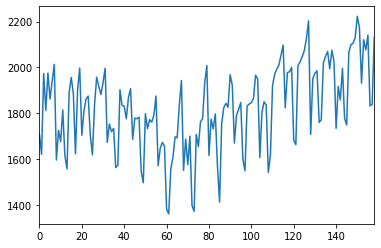

In [121]:
old = amtrak['Ridership'].plot()
plt.show()

In [52]:
#Splitting the data: As we can't do random split, train & validation

In [62]:
Train = amtrak.head(147)
Test = amtrak.tail(12)

In [63]:
####################### L I N E A R ##########################
import statsmodels.formula.api as smf

In [64]:
linear_model = smf.ols('Ridership~t',data=Train).fit()

In [79]:
pred_linear = linear_model.predict(Test['t'])
resid = Test['Ridership'] - pred_linear
rmse_linear = np.sqrt(np.mean(np.square(resid)))
rmse_linear

209.92559265462546

In [66]:
##################### Exponential ##############################

In [80]:
exp_model = smf.ols('log_Ridership~t',data=Train).fit()
pred_exp = exp_model.predict(Test['t'])
resid = Test['Ridership'] - np.exp(pred_exp)
rmse_exp = np.sqrt(np.mean(np.square(resid)))
rmse_exp

217.0526356681357

In [81]:
#################### Quadratic ###############################
Quad = smf.ols('Ridership~t+t-squared',data=Train).fit()
pred_Quad = Quad.predict(Test['t'])
resid = Test['Ridership'] - pred_Quad
rmse_Quad = np.sqrt(np.mean(np.square(resid)))
rmse_Quad

209.92559265462546

In [82]:
################### Additive seasonality ########################
add_sea = smf.ols('Ridership~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add = add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
resid = Test['Ridership'] - pred_add
rmse_add_sea = np.sqrt(np.mean(np.square(resid)))
rmse_add_sea

264.664390056878

In [83]:
################## Additive Seasonality Quadratic ############################
add_sea_Quad = smf.ols('Ridership~t+t-squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_Quad = add_sea_Quad.predict(Test[['t','t-squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
resid = Test['Ridership'] - pred_add_sea_Quad
rmse_add_sea_Quad = np.sqrt(np.mean(np.square(resid)))
rmse_add_sea_Quad

168.6315547855481

In [84]:
################## Multiplicative Seasonality ##################
Mul_sea = smf.ols('log_Ridership~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mul_sea = Mul_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
resid = Test['Ridership'] - np.exp(pred_Mul_sea)
rmse_Mul_sea = np.sqrt(np.mean(np.square(resid)))
rmse_Mul_sea

268.19703253092257

In [85]:
##################Multiplicative Additive Seasonality ###########
Mul_Add_sea = smf.ols('log_Ridership~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mul_Add_sea = Mul_Add_sea.predict(Test[['t','t-squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
resid = Test['Ridership'] - np.exp(pred_Mul_Add_sea)
rmse_Mul_Add_sea = np.sqrt(np.mean(np.square(resid)))
rmse_Mul_Add_sea

172.76726784671573

In [88]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_Quad,rmse_add_sea,rmse_add_sea_Quad,rmse_Mul_sea,rmse_Mul_Add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,209.925593
1,rmse_Exp,217.052636
2,rmse_Quad,209.925593
3,rmse_add_sea,264.664390
4,rmse_add_sea_quad,168.631555
5,rmse_Mult_sea,268.197033
6,rmse_Mult_add_sea,172.767268


In [89]:
#Final model is rmse_add_sea_quad.Let's predict with new data

In [90]:
Predict_data = pd.read_csv(r"C:\Users\srira\Desktop\Ram\Data science\Datasets\Module 26 - Forecasting or Timeseries\Predict_new.csv")
Predict_data.head()

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
0,4-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,4-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,4-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,4-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,4-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896


In [109]:
pred_new = add_sea_Quad.predict(Predict_data)

In [128]:
pred_new = pd.DataFrame(pred_new)

In [116]:
pred_new = pred_new.set_index(np.arange(160,172))
pred_new

,0
160,1965.839198
161,1997.005865
162,1955.672531
163,2060.255865
164,2105.339198
165,1772.255865
166,1911.839198
167,1901.839198
168,1945.922531
169,1721.884888


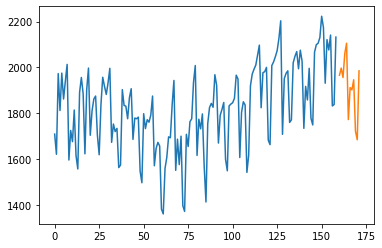

In [127]:
plt.plot(amtrak['Ridership'])
plt.plot(pred_new)
plt.show()

In [55]:
amtrak.columns

Index(['Month', 'Ridership', 'months', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 't-squared',
       'log-Ridership'],
      dtype='object')